In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
import warnings

warnings.filterwarnings("ignore")

In [ ]:
CarDekho_data = pd.read_csv('cardekho_dataset.csv')

In [ ]:
CarDekho_data.shape  #number of rows and columns in the dataset

(15411, 14)

In [ ]:
CarDekho_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
CarDekho_data.drop(['Unnamed: 0','car_name','seller_type','seats'], axis=1, inplace=True)

In [ ]:
CarDekho_data.rename(columns={'max_power': 'hp'}, inplace=True)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
CarDekho_data.head(10)

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,hp,selling_price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,46.30,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,82.00,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,80.00,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,67.10,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,98.59,570000
5,Maruti,Wagon R,8,35000,Petrol,Manual,18.90,998,67.10,350000
6,Hyundai,i10,8,40000,Petrol,Manual,20.36,1197,78.90,315000
7,Maruti,Wagon R,3,17512,Petrol,Manual,20.51,998,67.04,410000
8,Hyundai,Venue,2,20000,Petrol,Automatic,18.15,998,118.35,1050000
9,Maruti,Swift,4,28321,Petrol,Manual,16.60,1197,85.00,511000


In [ ]:
CarDekho_data.shape

(15411, 10)

In [ ]:
CarDekho_data.rename(columns={'selling_price': 'price'}, inplace=True)
#CarDekho_data['price'] = (CarDekho_data['price']) /100000


In [ ]:
CarDekho_data.describe()

,vehicle_age,km_driven,mileage,engine,hp,price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,6.04,55616.48,19.70,1486.06,100.59,774971.12
std,3.01,51618.55,4.17,521.11,42.97,894128.36
min,0.00,100.00,4.00,793.00,38.40,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,556000.00
75%,8.00,70000.00,22.70,1582.00,117.30,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,39500000.00


In [ ]:
CarDekho_data[CarDekho_data['vehicle_age']==0]

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,hp,selling_price
5078,Maruti,Ignis,0,5000,Petrol,Manual,20.89,1197,81.80,550000
7789,Mahindra,KUV,0,30000,Petrol,Manual,18.15,1198,82.00,400000
10315,BMW,5,0,2000,Diesel,Automatic,22.48,1995,187.74,4850000
11486,BMW,5,0,2000,Diesel,Automatic,22.48,1995,187.74,4850000
12157,Maruti,S-Presso,0,5000,Petrol,Manual,21.70,998,67.00,500000


In [ ]:
CarDekho_data.tail(10)

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,hp,selling_price
15401,Maruti,Swift,3,25000,Petrol,Automatic,22.00,1197,81.80,590000
15402,Honda,Amaze,6,28000,Diesel,Manual,25.80,1498,98.60,525000
15403,Renault,KWID,2,2700,Petrol,Manual,25.17,799,53.30,395000
15404,Maruti,Ertiga,5,56829,Diesel,Manual,20.77,1248,88.80,895000
15405,Hyundai,Grand,5,9229,Petrol,Manual,18.90,1197,82.00,545000
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,68.05,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,91.10,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,103.52,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,140.00,1225000
15410,Honda,City,2,13000,Petrol,Automatic,18.00,1497,117.60,1200000


=> **MISSING VALUES IN THE DATASET **

In [ ]:
#FINDING MISSING VALUES IN THE DATASET
missing_values = CarDekho_data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(CarDekho_data)) * 100

# Create a new DataFrame to store the missing value statistics
missing_data_stats = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the missing value statistics
print(missing_data_stats)

                   Missing Values  Missing Percentage
brand                           0                0.00
model                           0                0.00
vehicle_age                     0                0.00
km_driven                       0                0.00
fuel_type                       0                0.00
transmission_type               0                0.00
mileage                         0                0.00
engine                          0                0.00
hp                              0                0.00
selling_price                   0                0.00


AFTER INSPECTING THE DATASET NO MISSING VALUES WERE FOUND.

In [ ]:
#NOT Required
num_cols = ['price','engine','mileage','km_driven','hp']
fe_cols = ['fuel_type','transmission_type','brand','model']

CarDekho_data[num_cols] = CarDekho_data[num_cols].replace(0, np.nan, regex=False)
CarDekho_data[fe_cols] = CarDekho_data[fe_cols].replace({"–": np.nan})


In [ ]:

CarDekho_data['price_zscore'] = (CarDekho_data['price'] - CarDekho_data['price'].median()) / CarDekho_data['price'].std()

outlier_upp = CarDekho_data[CarDekho_data['price_zscore']>3]
outlier_low = CarDekho_data[CarDekho_data['price_zscore']<-3]

print("# lower Outliers",outlier_low.shape)
print("# upper Outliers",outlier_upp.shape)


# lower Outliers (0, 11)
# upper Outliers (345, 11)


In [ ]:
CarDekho_data.shape
CarDekho_data.drop(CarDekho_data[(CarDekho_data['price_zscore'] >3)].index, inplace=True)
CarDekho_data.drop(columns=['price_zscore'], axis=1, inplace=True)
CarDekho_data.shape

(15066, 10)

In [ ]:
# rerun step 5
from scipy.stats import zscore

# Assuming data is your DataFrame
usedcars_filtered = CarDekho_data

# Group rows by 'make' and 'model'

grouped_models = usedcars_filtered.groupby(['brand', 'model'])

# Define a function to calculate z-scores within each group
def calculate_zscores(group):
    group['cc-zscore'] = zscore(group['engine'])
    return group

# Apply the function to each group and concatenate the results
result = grouped_models.apply(calculate_zscores)
u_cc_outlier = result[result['cc-zscore']>3]
l_cc_outlier = result[result['cc-zscore']<-3]

# Display the resulting DataFrame
#print(result)
print(u_cc_outlier.count())
print('************ Lower outliers ***********************')
print(l_cc_outlier.count())

brand                63
model                63
vehicle_age          63
km_driven            63
fuel_type            63
transmission_type    63
mileage              63
engine               63
hp                   63
price                63
cc-zscore            63
dtype: int64
************ Lower outliers ***********************
brand                76
model                76
vehicle_age          76
km_driven            76
fuel_type            76
transmission_type    76
mileage              76
engine               76
hp                   76
price                76
cc-zscore            76
dtype: int64


In [ ]:
# Drop 'cc-outliers' model-wise -rerun step 6

usedcars_filtered.drop(usedcars_filtered[(result['cc-zscore'] < -3) | (result['cc-zscore'] > 3)].index, inplace=True)

CarDekho_data = usedcars_filtered

In [ ]:
CarDekho_data.shape

(14927, 10)

In [ ]:
CarDekho_data.describe()

,vehicle_age,km_driven,mileage,engine,hp,price
count,14927.00,14927.00,14927.00,14927.00,14927.00,14927.00
mean,6.08,56219.00,19.81,1458.77,97.27,677350.56
std,3.01,52080.86,4.12,482.07,36.46,485964.13
min,0.00,100.00,7.94,796.00,38.40,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,380000.00
50%,6.00,50000.00,19.70,1248.00,88.50,550000.00
75%,8.00,71000.00,22.70,1582.00,110.00,795000.00
max,29.00,3800000.00,33.54,4806.00,500.00,3200000.00


In [ ]:
correlation_matrix = CarDekho_data.corr()

# Select correlations of 'Price' with other attributes
price_correlation = correlation_matrix['price']

# Create a DataFrame for the correlation values
correlation_table = pd.DataFrame({'Attribute': price_correlation.index, 'Correlation with Price': price_correlation.values})

# Sort the table by absolute correlation values
correlation_table['Abs Correlation'] = correlation_table['Correlation with Price'].abs()
correlation_table = correlation_table.sort_values(by='Abs Correlation', ascending=False)

# Display the correlation table
print(correlation_table)

     Attribute  Correlation with Price  Abs Correlation
5        price                    1.00             1.00
4           hp                    0.76             0.76
3       engine                    0.64             0.64
2      mileage                   -0.34             0.34
0  vehicle_age                   -0.32             0.32
1    km_driven                   -0.04             0.04


=>**RANGE OF SELLING PRICES IN THE DATASET **

In [ ]:
# Find the car with the highest price
car_highest_price = CarDekho_data.loc[CarDekho_data['selling_price'].idxmax()]

# Find the car with the lowest price
car_lowest_price = CarDekho_data.loc[CarDekho_data['selling_price'].idxmin()]

print(f"The car having highest selling price is {car_highest_price['car_name']} with a price of Rs.{car_highest_price['selling_price']}")
print(f"The car with the lowest selling price is {car_lowest_price['car_name']} with a price of Rs.{car_lowest_price['selling_price']}")
price_range =  CarDekho_data['selling_price'].max() -  CarDekho_data['selling_price'].min()

print(f"The range of prices in the dataset is: {price_range:.2f}")

The car having highest selling price is Jaguar XF with a price of Rs.3450000
The car with the lowest selling price is Maruti Wagon R with a price of Rs.55000
The range of prices in the dataset is: 3395000.00


1) WHAT ARE THE TOP 10 MOST SOLD CARS IN THE DATASET?

In [ ]:
print('-'*50)
print('Top 10 Sold Cars in the dataset')
print('-'*50)

CarDekho_data.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars in the dataset
--------------------------------------------------


Hyundai i20           905
Maruti Swift Dzire    888
Maruti Swift          778
Honda City            746
Maruti Alto           735
Maruti Wagon R        660
Hyundai Grand         580
Hyundai Verna         491
Hyundai i10           410
Ford Ecosport         372
Name: car_name, dtype: int64

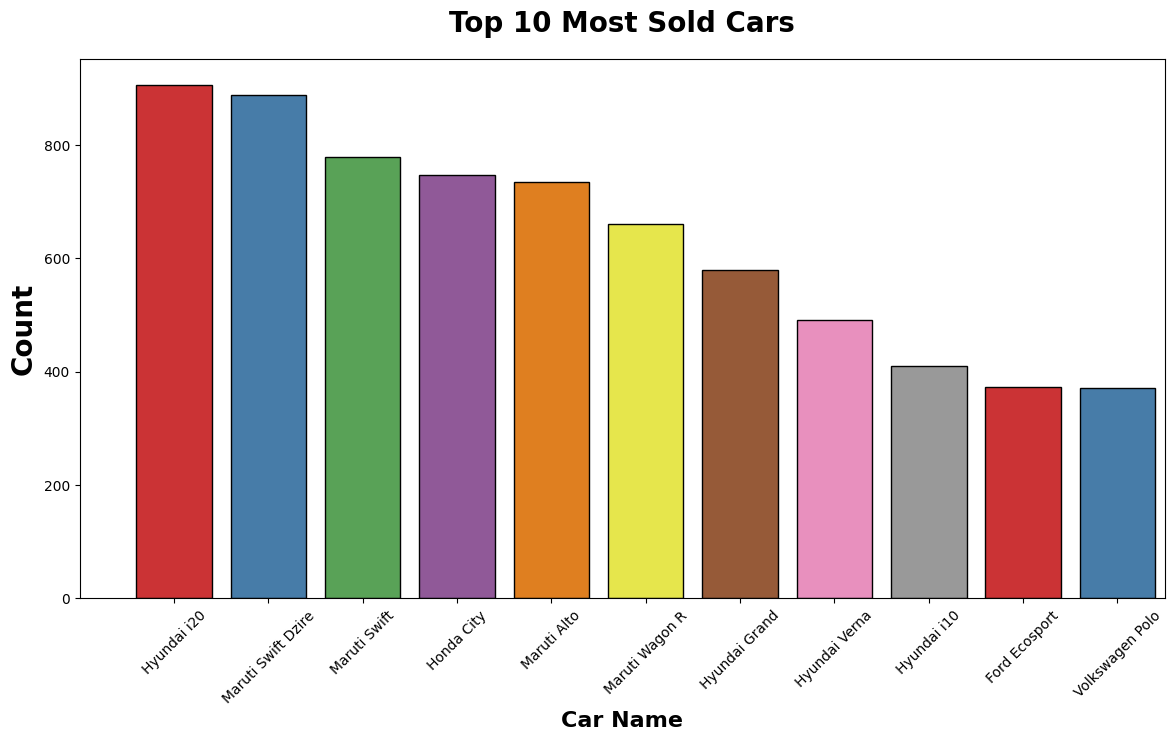

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=CarDekho_data,ec = "black",palette="Set1",order = CarDekho_data['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Cars", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

FROM THE BAR GRAPH WE CAN INFER THAT IN THE TOP 10 LIST:

HYUNDAI i20 IS THE MOST SOLD CAR ON CAR DEKHO WEBSITE  FOLLOWED BY MARUTI SWIFT DESIRE , SWIFT , ALTO , HONDA CITY AND SO ON TILL FORD ECOSPORT.

2) GIVE TOP 10 MOST SOLD CAR BRANDS IN THE DATASET?

In [ ]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

CarDekho_data.brand.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


Maruti        4883
Hyundai       2979
Honda         1471
Mahindra       850
Ford           762
Volkswagen     615
Toyota         559
Renault        534
Tata           429
Skoda          325
Name: brand, dtype: int64

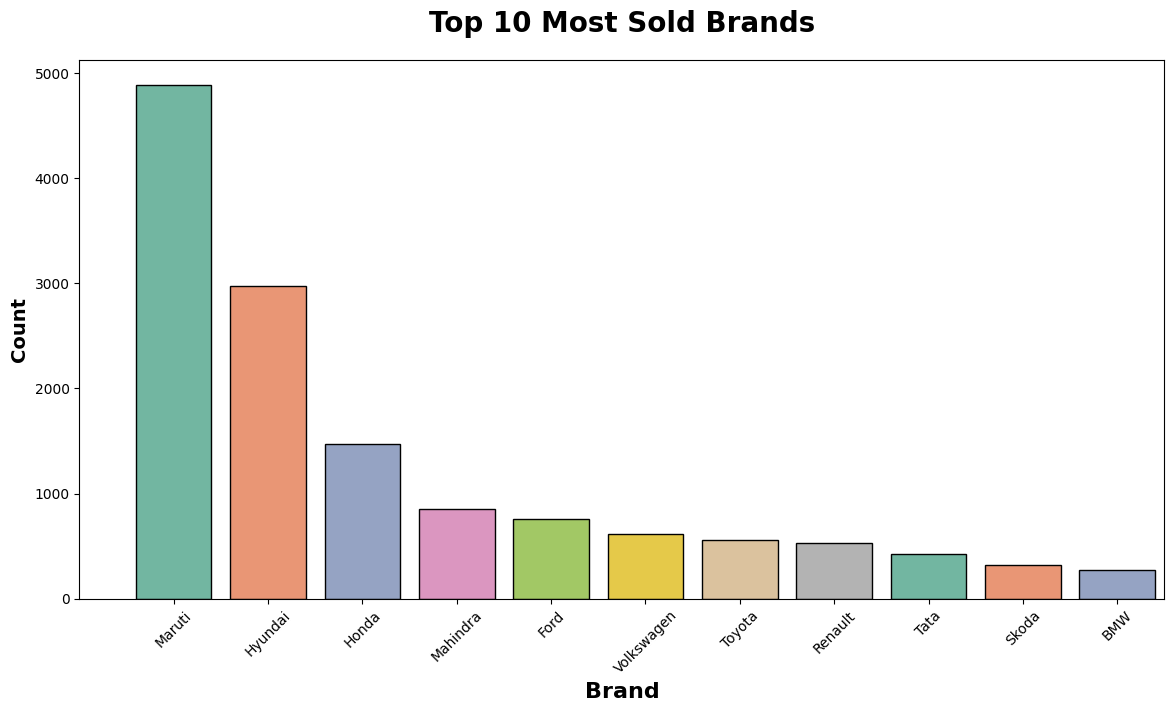

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=CarDekho_data,ec = "black",palette="Set2",order = CarDekho_data['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brands", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

MARUTI WINS THE RACE OF TOP 10 MOST SOLD CAR BRANDS FOLLOWED BY HYUNDAI AND HONDA. THE BAR GRAPH ABOVE DEPICTS IT CLEARLY.

3) WHAT ARE THE TOP 10 COSTLIEST BRANDS IN THE DATASET?

In [ ]:
brand_mean_prices = CarDekho_data.groupby('brand')['selling_price'].mean()

# Sort brands by mean selling price in descending order
sorted_brands = brand_mean_prices.sort_values(ascending=False)




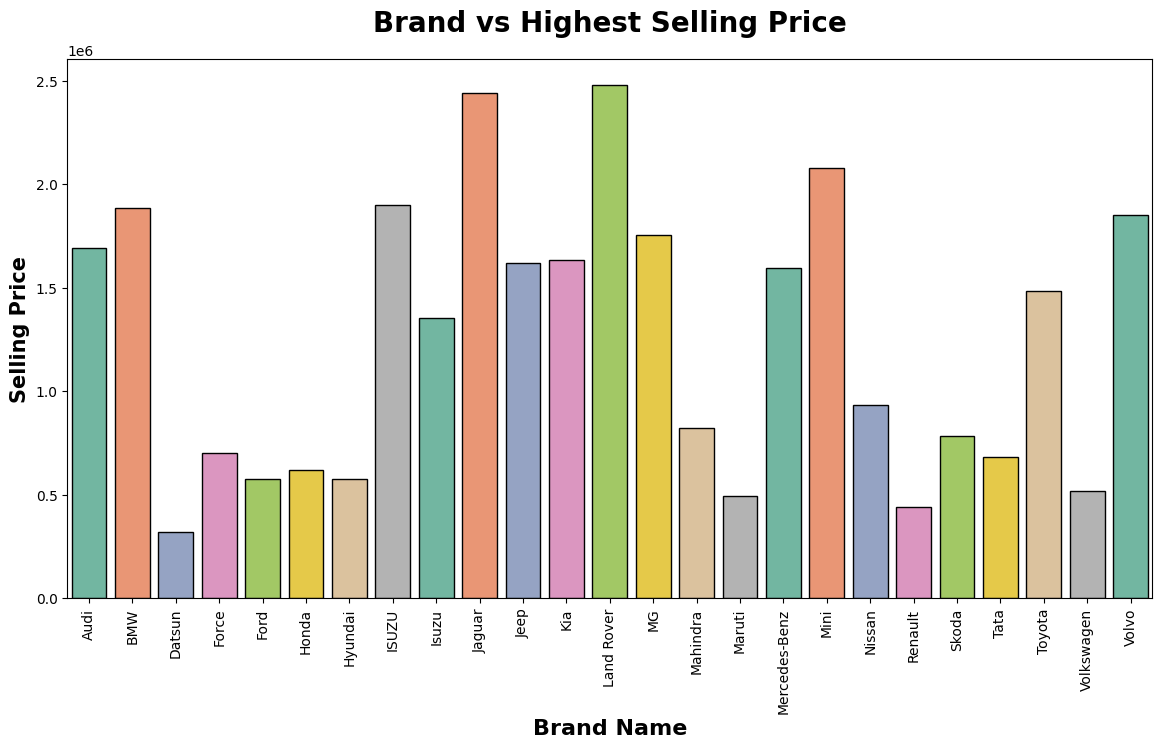

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=brand_mean_prices .index, y=brand_mean_prices .values, ec="black", palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

LAND ROVER IS THE MOST EXOENSIVE CAR BRAND AMONGST ALL THE OTHER BRANDS.

4) FIND THE MOST MILEAGE CAR BRANDS IN THR DATASET.

In [ ]:
mileage= CarDekho_data.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand in the dataset')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand in the dataset
--------------------------------------------------


,mileage
brand,
Maruti,22.339672
Renault,22.106404
Datsun,21.219112
Ford,20.216693
Honda,19.952046
Tata,19.774359
Hyundai,19.588701
Volkswagen,18.685675
Mini,18.347500


AS PER THE DATA MARUTI SUZUKI BRAND CARS GIVE THE HIGHEST MILEAGE AMONGST ALL THE CAR BRANDS IN THE DATASET.

5) ARE THERE ANY NOTABLE PERFORMANCE DIFFERENCES BETWEEN PETROL AND DIESEL CARS IN TERMS OF MILEAGE AND PRICE?

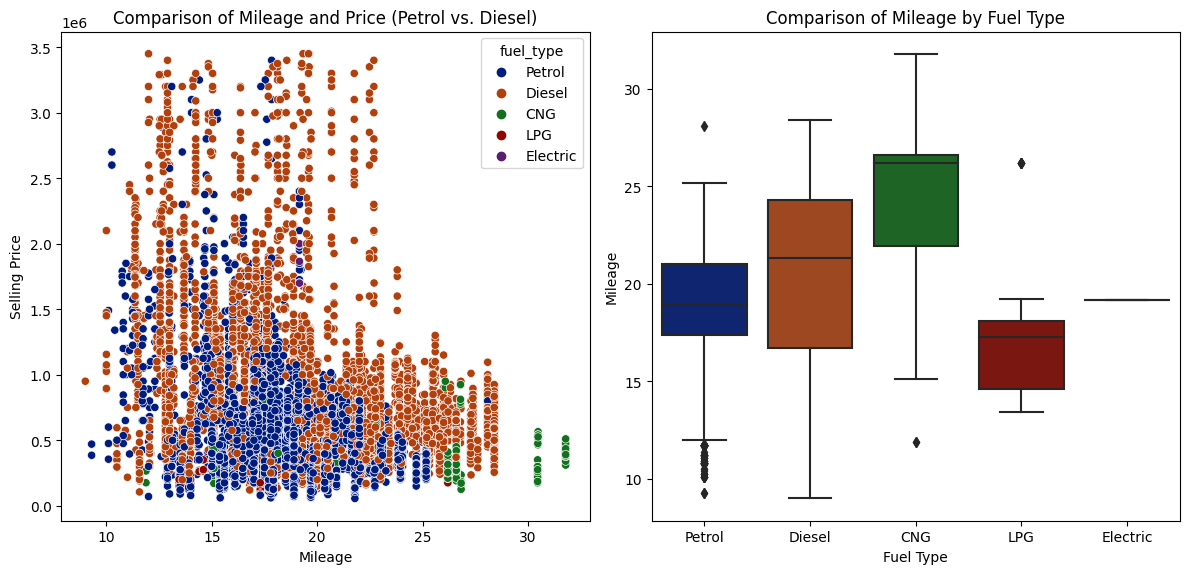

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=CarDekho_data, x='mileage', y='selling_price', hue='fuel_type', palette='dark')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Comparison of Mileage and Price (Petrol vs. Diesel)')

plt.subplot(1, 2, 2)
sns.boxplot(data=CarDekho_data, x='fuel_type', y='mileage', palette='dark')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Comparison of Mileage by Fuel Type')

plt.tight_layout()
plt.show()


Mileage and Price Comparison (Scatter Plot):
The scatter plot  allows you to visually compare both mileage and price for both petrol and diesel cars.
**observations:**
petrol cars generally have a wider range of mileage values, suggesting a larger variety in fuel efficiency within the petrol category.
Diesel cars, on average, tend to have slightly higher mileage compared to petrol cars.


Mileage Comparison by Fuel Type (Box Plot):
The box plot in the second subplot specifically compares the mileage of petrol and diesel cars:
Diesel cars have a higher median mileage compared to petrol cars. This suggests that, on average, diesel cars are more fuel-efficient and can travel more distance per unit of fuel.


 6) HOW DOES THE TRANSMISSION TYPE AFFECT SEELING PRICE OF THE CARS IN THE DATASET?

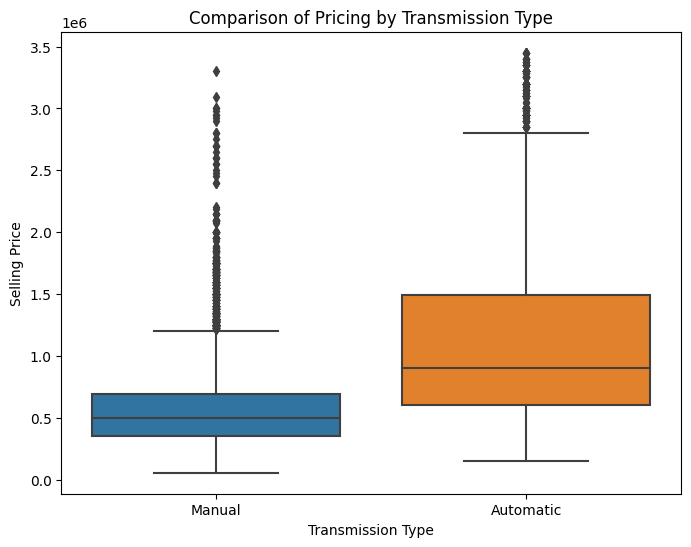

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=CarDekho_data, x='transmission_type', y='selling_price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Comparison of Pricing by Transmission Type')
plt.show()

From the box plot, you can infer the following regarding the relationship between transmission type (automatic vs. manual) and pricing of cars:

Automatic vs. Manual Pricing: The plot will show the central tendency and spread of pricing for both automatic and manual cars. If automatic cars tend to be priced higher, we will  see a clear difference in the medians or quartiles between the two transmission types.

7) How does the mileage vary based on the fuel type and transmission of the cars?

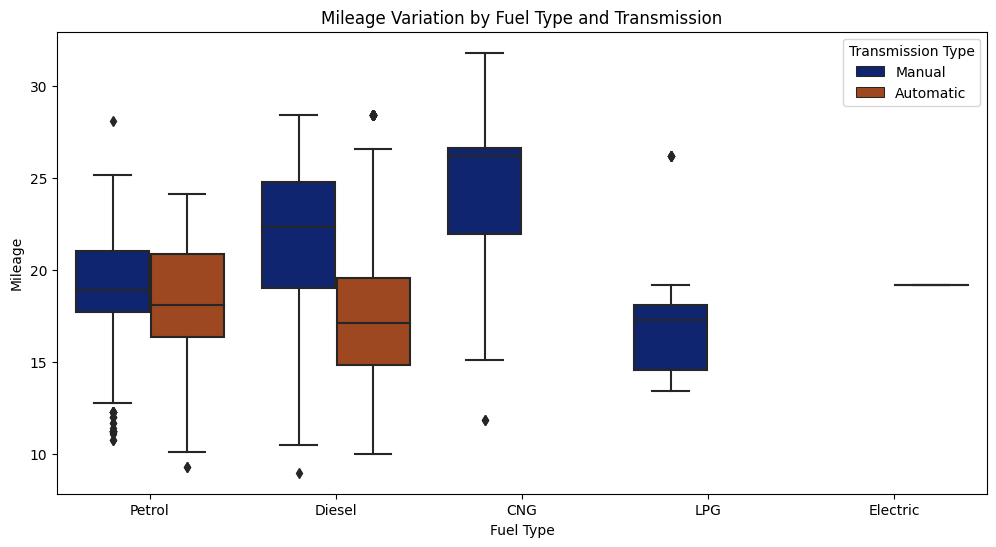

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=CarDekho_data, x='fuel_type', y='mileage', hue='transmission_type', palette='dark')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Mileage Variation by Fuel Type and Transmission')
plt.legend(title='Transmission Type')
plt.show()

Diesel vehicles tend to have higher median mileage compared to Petrol vehicles across all transmission types.
Automatic transmission vehicles, in general, appear to have slightly lower median mileage than Manual transmission vehicles for each fuel type.
There are some outliers in certain categories, suggesting that some vehicles have exceptionally high or low mileage compared to the majority in their respective categories.

8) MOST COMMON PRICE RANGE CATEGORY THAT IS PREFERRED BY THE MAJORITY.

In [ ]:
print("Counts for Each Price Range Category:")
print(CarDekho_data['selling_price'].value_counts())

# Find the most popular price range category
most_popular_price_range = CarDekho_data['selling_price'].value_counts().idxmax()
print("\nMost Popular Price Range Category:", most_popular_price_range)

Counts for Each Price Range Category:
450000    344
550000    321
650000    320
350000    317
500000    255
         ... 
608000      1
638000      1
834000      1
783000      1
456000      1
Name: selling_price, Length: 923, dtype: int64

Most Popular Price Range Category: 450000


The most popular price range category is Rs. 450000.
This inplies that buyers on the car dekho website generally prefer cars having price closer to this range.

LABEL ENCODING

In [ ]:
#Importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
label_encoder = LabelEncoder()

for col in CarDekho_data.select_dtypes(include=['object']).columns:
    CarDekho_data[col] = label_encoder.fit_transform(CarDekho_data[col])

**LINEAR REGRESSION **

In [ ]:
X = CarDekho_data.drop('price', axis=1)
y = CarDekho_data['price']

In [ ]:
X.shape

(14927, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,y_train)

# Get coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Display equation of the model
equation = f"y = {intercept:.2f} + "
for i, coeff in enumerate(coefficients):
    equation += f"{coeff:.2f} * {X_test.columns[i]} + "
equation = equation[:-2]  # Remove the last '+'
print("Equation:", equation)

print("Linear Regression Model")
print(f"Train Score: {lr.score(X_train, y_train):.2f}")
print(f"Test Score: {lr.score(X_test, y_test):.2f}")

Equation: y = 614724.26 + 394.08 * brand + -649.04 * model + -55189.73 * vehicle_age + -0.62 * km_driven + -46663.25 * fuel_type + -177185.53 * transmission_type + -7782.50 * mileage + 123.54 * engine + 7173.70 * hp 
Linear Regression Model
Train Score: 0.74
Test Score: 0.74


THE TRAIN SCORE FOR LINEAR REGRESSION MODEL IS 74% AND THE TRAIN SCORE IS 74%.

**KNN MODEL **

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)


print("K-Nearest Neighbors Regressor Model")
print(f"Train Score: {knn_model.score(X_train_scaled, y_train):.2f}")
print(f"Test Score: {knn_model.score(X_test_scaled, y_test):.2f}")

K-Nearest Neighbors Regressor Model
Train Score: 0.94
Test Score: 0.92


THE TRAIN SCORE FOR KNN MODEL IS 94%  AND THE TEST SCORE FOR KNN MODEL IS 92%.

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

print("Decision Tree Regression Model")
print(f"Train Score: {decision_tree_model.score(X_train, y_train):.2f}")
print(f"Test Score: {decision_tree_model.score(X_test, y_test):.2f}")

Decision Tree Regression Model
Train Score: 1.00
Test Score: 0.88


The Train score for Decision Tree Regression model is 100% and the test score is 88%.

RANDOM FOREST REGRESSOR

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=10 ,random_state=42, max_depth=10)
random_forest_model.fit(X_train, y_train)

print("RandomForest Regression Model")
print(f"Train Score: {random_forest_model.score(X_train, y_train):.2f}")
print(f"Test Score: {random_forest_model.score(X_test, y_test):.2f}")


RandomForest Regression Model
Train Score: 0.96
Test Score: 0.92


THE TRAIN SCORE FOR RANDOM FOREST REGRESSION IS 96% ANS THE TEST SCORE IS 92%.

GRADIENT BOOSTING REGRESSOR


In [ ]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

print("Gradient Boosting Model")
print(f"Train Score: {gradient_boosting_model.score(X_train, y_train):.2f}")
print(f"Test Score: {gradient_boosting_model.score(X_test, y_test):.2f}")

Gradient Boosting Model
Train Score: 0.92
Test Score: 0.91


THE TRAIN SCORE FOR GBR MODEL IS 92% AND THE TEST SCORE FOR GBR MODEL IS 91%.

XGBOOST REGRESSION

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import cross_val_score

# XGBoost
from xgboost import XGBRegressor, plot_importance, XGBClassifier

xgb_model = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)
# Fitting the data
xgb_model.fit(X_train, y_train)

# Checking the score
print(f"Training Score:  {xgb_model.score(X_train, y_train):.2f}")
print(f"Testing Score: {xgb_model.score(X_test, y_test):.2f}")

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
scoring_metric = 'r2'  # Use R-squared score for evaluation, you can change to other metrics

cross_val_scores = cross_val_score(xgb_model, X, y, cv=num_folds, scoring=scoring_metric)

# Print the cross-validation scores
#for fold, score in enumerate(cross_val_scores, start=1):
#    print(f"Fold {fold}: {score:.2f}")

# Print the average cross-validation score
average_score = np.mean(cross_val_scores)
print(f"Average Cross-Validation {scoring_metric.upper()} Score: {average_score:.2f}")


Training Score:  0.96
Testing Score: 0.93


The TRAIN SCORE OF XGBOOST MODEL IS 96% AND TEST SCORE IS 93%.

<Figure size 1000x600 with 0 Axes>

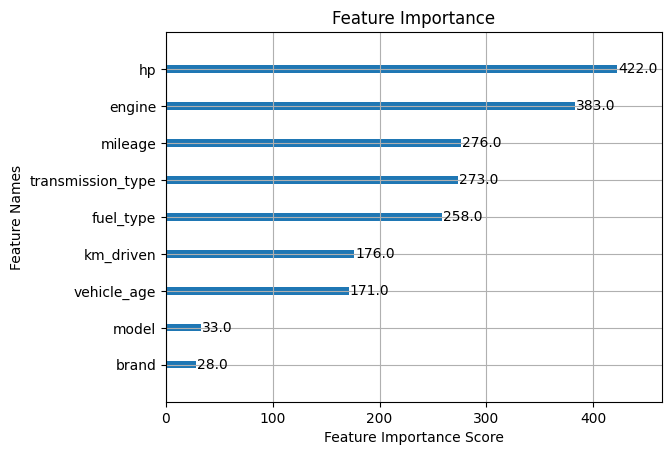

In [ ]:
# Get feature importance and feature names
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # You can use 'weight', 'gain', or 'cover'
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Names')

# Set y-axis tick labels as the original feature names
plt.yticks(range(len(feature_names)), feature_names)

plt.show()

In [ ]:
# bias distribution

y_predict = xgb_model.predict(X_test)

upper_bias_count = 0
lower_bias_count = 0

for true_val, pred_val in zip(y_test, y_predict):
    if pred_val > true_val:
        upper_bias_count += 1
    elif pred_val < true_val:
        lower_bias_count += 1

total_samples = len(y_test)
upper_bias_proportion = upper_bias_count / total_samples
lower_bias_proportion = lower_bias_count / total_samples

print("Total Predicted records: ",  total_samples)
print(f"Proportion of Upper Bias:  {upper_bias_proportion:.2f}")
print(f"Proportion of Lower Bias:  {lower_bias_proportion:.2f}")


Total Predicted records:  2986
Proportion of Upper Bias:  0.52
Proportion of Lower Bias:  0.48
